# Nama : Achmad Fadlan Bhahreisy
# NPM : 06.2018.1.06992

## 1. import & read image

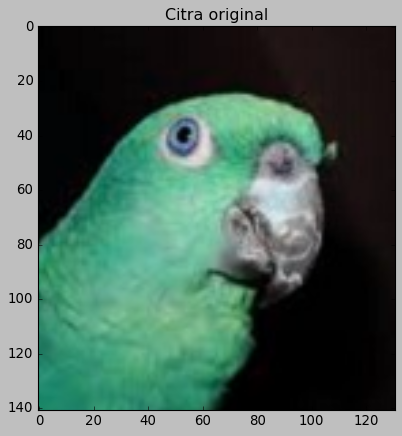

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

imgOri = cv2.imread("beo.png")
#Citra original
plt.title('Citra original')
plt.imshow(imgOri)
plt.show()

## 2. Grayscale

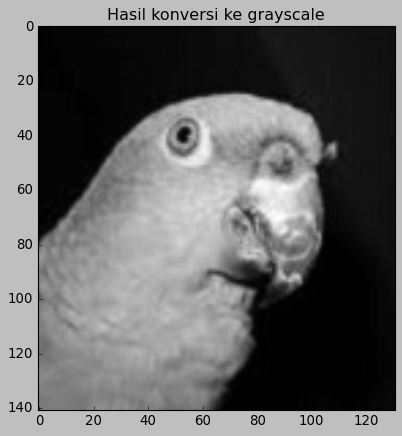

In [2]:
#Convert ke grayscale
img = cv2.cvtColor(imgOri, cv2.COLOR_BGR2GRAY)

#Konversi ke grayscale
plt.title('Hasil konversi ke grayscale')
plt.imshow(img, cmap='gray')
#plt.imshow(img)
plt.show()

In [3]:
print(img)

[[  2   1   3 ...  15  15  14]
 [  2   0   3 ...  15  14  14]
 [  2   0   3 ...  15  14  14]
 ...
 [113 112 113 ...   8   6   7]
 [114 113 114 ...   8   6   7]
 [112 113 114 ...   8   6   7]]


## 3. Mencari Threshold value

In [4]:
h,w = np.shape(img)
t0=127
t=127 #initial condition
g1 = []
g2 = []
# camel_Prewitt camel_Prewitt_X camel_Prewitt_Y
#calculating t by algorithm
while(1):
    for px in range(0,h):
        for py in range(0,w):
            if (img[px][py] < t):
                g1.append(img[px][py])
            else:
                g2.append(img[px][py])
    mu1 = sum(g1) / len(g1)
    mu2 = sum(g2) / len(g2)
    t0=t
    t = ((mu1+ mu2)/2)
    delta_t = abs(t-t0)
#    print(mu1,mu2,t,delta_t)
    if(delta_t < 1):
        break
print (len(g1))
print(t)
rata2 = round(t,0)
print(rata2)

50889
82.33079718527033
82.0


## 4. Proses Threshold

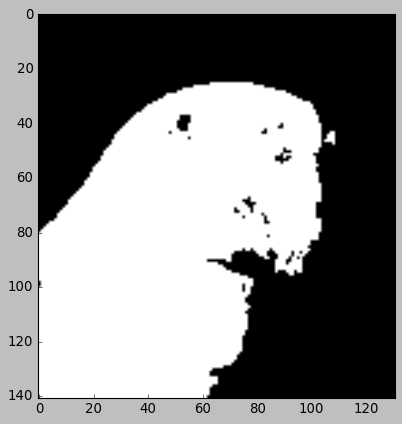

In [5]:
# thres_finder(img)
np.shape(img)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

setelahnya = global_threshold(img,t,255,0)
plt.imshow(setelahnya, cmap='gray', vmin=0, vmax=255)

## 5. Mencari Contour

20


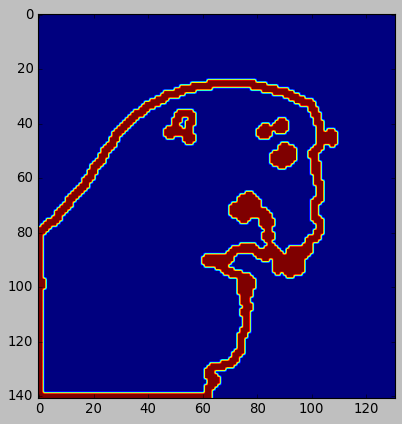

In [6]:
blank = np.zeros(setelahnya.shape, dtype='uint8')
contours, hirarki = cv2.findContours(setelahnya, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)}')
cv2.drawContours(blank, contours, -1, (255,255,255),2)
plt.imshow(blank)

In [7]:
print(setelahnya)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


## 6. Hasil

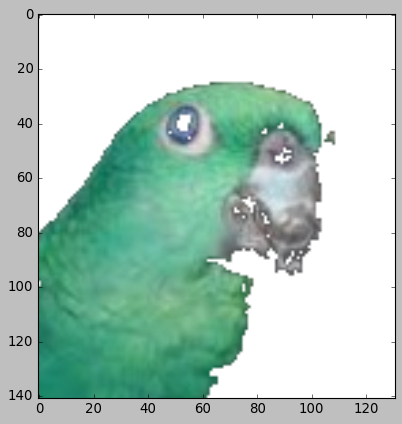

In [8]:
for i in range(len(setelahnya)):
    for j in range(len(setelahnya[0])):
        if setelahnya[i][j] != 255:
            imgOri[i][j][0] = 255
            imgOri[i][j][1] = 255
            imgOri[i][j][2] = 255
            
plt.imshow(imgOri)

In [9]:
# import the necessary packages
from tkinter import *
from PIL import Image
from PIL import ImageTk
from tkinter import filedialog
import cv2
import numpy as np

img = ''
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img
def select_image():
    
    global panelA, panelB, img
    
    path = filedialog.askopenfilename()
    
    if len(path) > 0:
        image1 = cv2.imread(path)
        image = cv2.imread(path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edged = cv2.Canny(img, 50, 100)
        
        h,w = np.shape(img)
        t0=127
        t=127 #initial condition
        g1 = []
        g2 = []
        # camel_Prewitt camel_Prewitt_X camel_Prewitt_Y
        #calculating t by algorithm
        while(1):
            for px in range(0,h):
                for py in range(0,w):
                    if (img[px][py] < t):
                        g1.append(img[px][py])
                    else:
                        g2.append(img[px][py])
            mu1 = sum(g1) / len(g1)
            mu2 = sum(g2) / len(g2)
            t0=t
            t = ((mu1+ mu2)/2)
            delta_t = abs(t-t0)
        #    print(mu1,mu2,t,delta_t)
            if(delta_t < 1):
                break
        
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        thresh = global_threshold(img, t, 255, 0)
        
        for i in range(len(thresh)):
            for j in range(len(thresh[0])):
                if thresh[i][j] != 255:
                    image[i][j][0] = 255
                    image[i][j][1] = 255
                    image[i][j][2] = 255
        
        image1 = Image.fromarray(image1)
        edged = Image.fromarray(image)
        
        image = ImageTk.PhotoImage(image1)
        edged = ImageTk.PhotoImage(edged)
        
        if panelA is None or panelB is None:
            
            panelA = Label(image=image)
            panelA.image = image
            panelA.pack(side="left", padx=10, pady=10)
            
            panelB = Label(image=edged)
            panelB.image = edged
            panelB.pack(side="right", padx=10, pady=10)
            
        else:
            # update the pannels
            panelA.configure(image=image)
            panelB.configure(image=edged)
            panelA.image = image
            panelB.image = edged
            
root = Tk()
panelA = None
panelB = None

btn = Button(root, text="Select an image", command=select_image)
btn.pack(side="bottom", fill="both", expand="yes", padx="10", pady="10")

root.mainloop()